In [2]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
selected_data = raw_data[['YearBuilt','YrSold','SaleType','SalePrice']]

In [6]:
selected_data.head()

,YearBuilt,YrSold,SaleType,SalePrice
0,2003,2008,WD,208500
1,1976,2007,WD,181500
2,2001,2008,WD,223500
3,1915,2006,WD,140000
4,2000,2008,WD,250000


In [24]:
# selected_data.YearBuilt.unique().sort()
print(selected_data.YearBuilt.value_counts())

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


In [10]:
len(selected_data.YrSold.unique())

5

In [11]:
selected_data.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [12]:
selected_data.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [14]:
vals = selected_data.SaleType.value_counts()

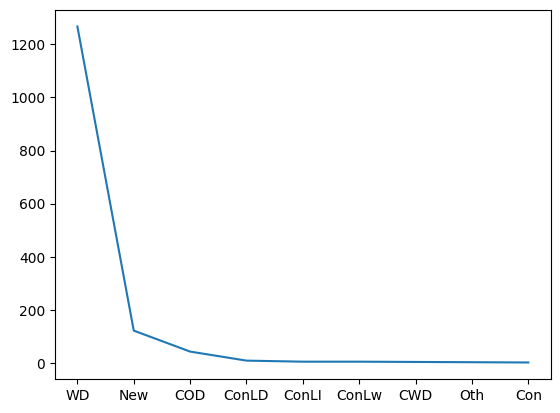

In [15]:
import matplotlib.pyplot as plt
plt.plot(vals.index, vals.values)

In [28]:
val_built = selected_data.YearBuilt.value_counts(sort=True)
print(val_built.index)
# plt.figure(figsize=(35,25))
# plt.plot(val_built.index, val_built.values)
# plt.xticks(range(1870, 2015, 2))
# plt.show()

Int64Index([2006, 2005, 2004, 2007, 2003, 1976, 1977, 1920, 1959, 1998,
            ...
            1906, 2010, 1898, 1904, 1882, 1875, 1911, 1917, 1872, 1905],
           dtype='int64', length=112)


In [49]:
bins = [1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000,2005, 2010]
raw_data['year_bin'] = pd.cut(raw_data['YearBuilt'], bins, ordered=True)
# print (raw_data.year_bin.value_counts())

AttributeError: 'Line2D' object has no property 'title'

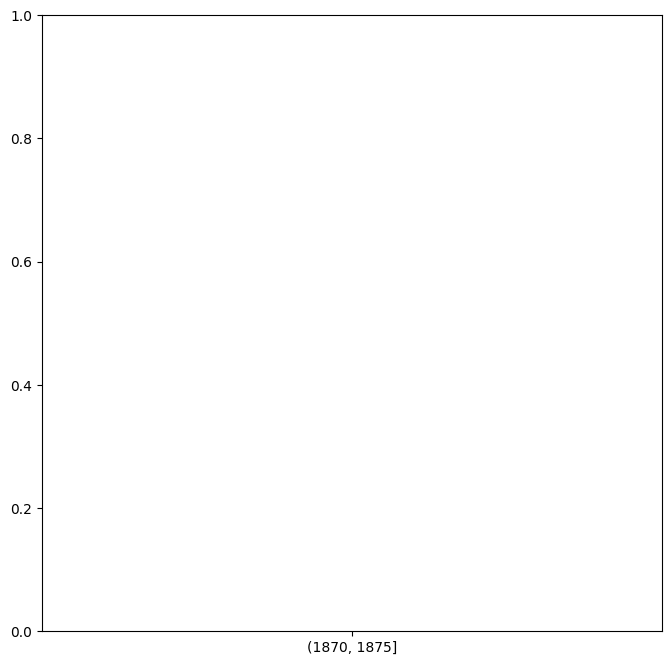

In [95]:
val_built = raw_data.year_bin.value_counts(sort=False)
plt.figure(figsize=(8,8))
plt.plot(val_built.index.astype(str), 
         val_built.values,
         linewidth=0.5,
         linestyle='--',
         color='b',
         marker='o',
         markersize=10,
         markerfacecolor='red')
plt.xticks(rotation='vertical')
plt.show()

In [62]:
sales_data = raw_data.groupby(['YrSold'])['SalePrice'].sum().reset_index()

In [63]:
sales_data

,YrSold,SalePrice
0,2006,57320530
1,2007,61214777
2,2008,53917695
3,2009,60648051
4,2010,31043893


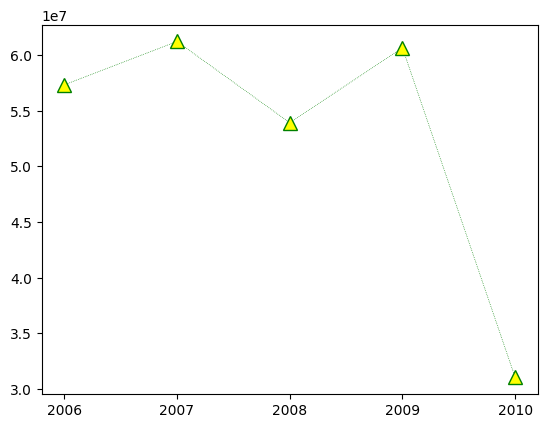

In [67]:
# Ogive
plt.plot(sales_data.YrSold, sales_data.SalePrice, linewidth=0.5,
    linestyle='dotted',
    color='g',
    marker='^',
    markersize=10,
    markerfacecolor='yellow')
plt.xticks(range(2006,2011, 1))
plt.show()

In [71]:
val_built.index

CategoricalIndex([(1870, 1875], (1875, 1880], (1880, 1885], (1885, 1890],
                  (1890, 1895], (1895, 1900], (1900, 1905], (1905, 1910],
                  (1910, 1915], (1915, 1920], (1920, 1925], (1925, 1930],
                  (1930, 1935], (1935, 1940], (1940, 1945], (1945, 1950],
                  (1950, 1955], (1955, 1960], (1960, 1965], (1965, 1970],
                  (1970, 1975], (1975, 1980], (1980, 1985], (1985, 1990],
                  (1990, 1995], (1995, 2000], (2000, 2005], (2005, 2010]],
                 categories=[(1870, 1875], (1875, 1880], (1880, 1885], (1885, 1890], ..., (1990, 1995], (1995, 2000], (2000, 2005], (2005, 2010]], ordered=True, dtype='category')

In [72]:
import plotly.express as px
fig = px.line(val_built, x=val_built.index.astype(str), y=val_built.values, title='Number of houses built in the years')
fig.show()

In [75]:
df = px.data.gapminder().query("country=='India'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in India')
fig.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 696 to 707
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    12 non-null     object 
 1   continent  12 non-null     object 
 2   year       12 non-null     int64  
 3   lifeExp    12 non-null     float64
 4   pop        12 non-null     int64  
 5   gdpPercap  12 non-null     float64
 6   iso_alpha  12 non-null     object 
 7   iso_num    12 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 864.0+ bytes


In [80]:
df2 = px.data.gapminder().query("country in ['India', 'China','Germany']")
df2 = df2.sort_values(by='lifeExp')
fig = px.line(df2, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()

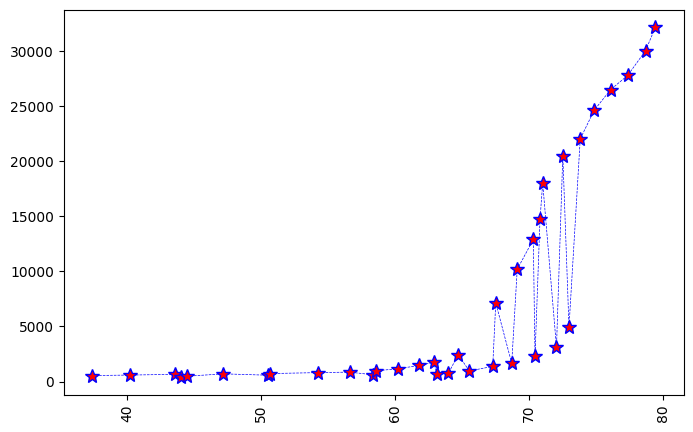

In [81]:
plt.figure(figsize=(8,5))
plt.plot(df2.lifeExp, 
         df2.gdpPercap,
         linewidth=0.5,
         linestyle='--',
         color='b',
         marker='*',
         markersize=10,
         markerfacecolor='red')
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df3 = px.data.stocks(indexed=True)
fig = px.line(df3, facet_row="company", facet_row_spacing=0.01, height=800, width=800)

In [87]:
fig.show()

In [88]:
# hide and lock down axes
fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=False, fixedrange=True)

In [89]:
# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

In [90]:
# strip down the rest of the plot
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    margin=dict(t=10,l=10,b=10,r=10)
)

In [91]:
# disable the modebar for such a small plot
fig.show(config=dict(displayModeBar=False))